In [25]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fname='elc_output.csv'
colfilter = ['Process','Period','PV']

In [26]:
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)

procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict={}

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#a.to_csv('df_test.csv', sep='\t')

In [27]:
print(procs)

['ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG' 'ELCTENUC' 'ELCTEOIL'
 'ELCTEPVS' 'ELCTEWND' 'FTE-DIMECCSG22' 'FTE-DIMELNG17' 'FTE-DIMEPVN17'
 'FTE-DIMESOL17' 'FTE-DIMEWOFX17' 'FTE-DIMEWON17' 'FTE-ELCSTG17' 'PEMFC22']


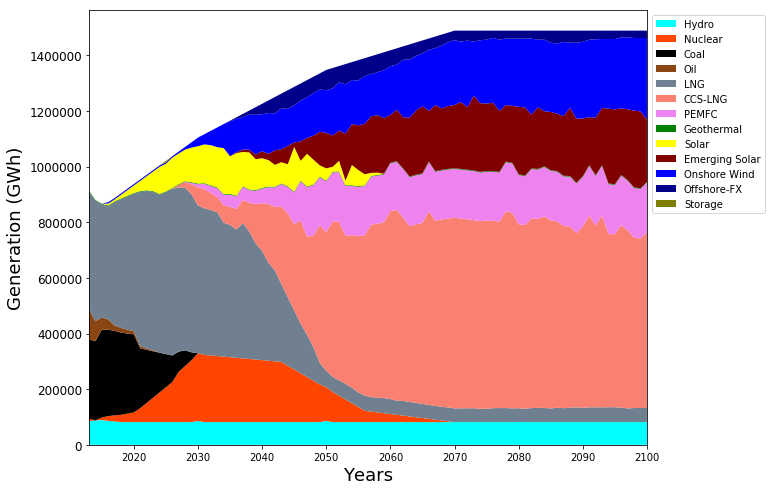

In [28]:
ordlegend=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'CCS-LNG','PEMFC',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore-FX',#'Offshore-FL',
           'Storage'
          ]
colours = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'salmon','violet',
           'green','yellow','maroon',
           'blue','darkblue',#'teal',
           'olive'
          ]
fig, ax = plt.subplots(figsize=(10, 8))
pltyrs=range(2013,2101)
ax.stackplot(pltyrs,  pltdict['ELCTEHYD'],pltdict['ELCTENUC'], 
             pltdict['ELCTECOA'],pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['FTE-DIMELNG17'],
             pltdict['FTE-DIMECCSG22'],pltdict['PEMFC22'],
              pltdict['ELCTEGEO'],pltdict['ELCTEPVS']+pltdict['FTE-DIMEPVN17'],pltdict['FTE-DIMESOL17'],
             pltdict['ELCTEWND']+pltdict['FTE-DIMEWON17'],pltdict['FTE-DIMEWOFX17'],#pltdict['FTE-DIMEWOFL17'],
            pltdict['FTE-ELCSTG17'],
             labels=ordlegend, colors=colours)
dmd=[913791,880396,866861,872251,8.87E+05,1.10E+06,1.35E+06,1.49E+06,1.49E+06]
yr=[2013,2014,2015,2016,2017,2030,2050,2070,2100]
#ax.plot(yr,dmd,color='black')
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax.grid()
#plt.xticks(np.arange(2013, 2100+1, 1.0))
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=12)
ax.set_xlim((2013, 2100))
#ax.set_ylim((0, 1000000))
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_xlabel('Years',fontsize='18')
ax.set_ylabel('Generation (GWh)',fontsize='18')
#fig.autofmt_xdate()
fig.savefig('elc_output_75mt.png',bbox_inches='tight', dpi=300)

In [13]:
fname='co2_emi_sources.csv'
colfilter = ['Process','Period','PV']

cdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
cdf = cdf[colfilter]
cdf=cdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
cdf=cdf.reset_index()
cdf.set_index('Period', inplace=True)

procs2 = cdf.Process.unique()
pltdict2={}

for prc in procs2:
    c=cdf.loc[cdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict2[prc]=c['PV']
print(procs2)

['ELCCC17' 'ELCPVN17' 'ELCTECOA' 'ELCTEGEO' 'ELCTEHYD' 'ELCTELNG'
 'ELCTENUC' 'ELCTEOIL' 'ELCTEPVS' 'ELCTEWND' 'ELCWOFL17' 'ELCWOFX17'
 'ELCWON17' 'EMSOL17' 'FTE-EALKH22' 'FTE-ELCSTG17' 'FTE-EPEMH22'
 'FTE-LTH22' 'LNGCCS22' 'PEMFC22']


In [14]:
fname='h2_sources.csv'
colfilter = ['Process','Period','PV']

h2df = pd.read_csv(fname, delimiter=';', usecols = colfilter)
h2df = h2df[colfilter]
h2df=h2df.groupby(['Process', 'Period']).sum() #sum values for same period, process
h2df=h2df.reset_index()
h2df.set_index('Period', inplace=True)

procs3 = h2df.Process.unique()
pltdict4={}

for prc in procs3:
    e=h2df.loc[h2df['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=e['PV']
print(procs3)

['FTE-EALKH22' 'FTE-EPEMH22' 'FTE-LTH22']


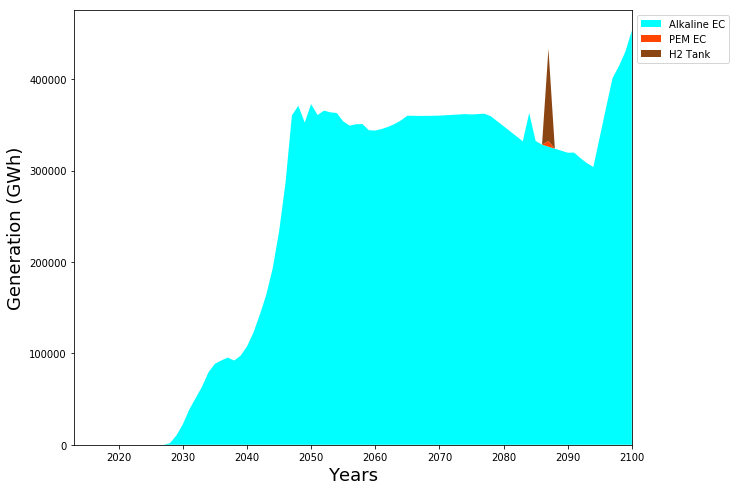

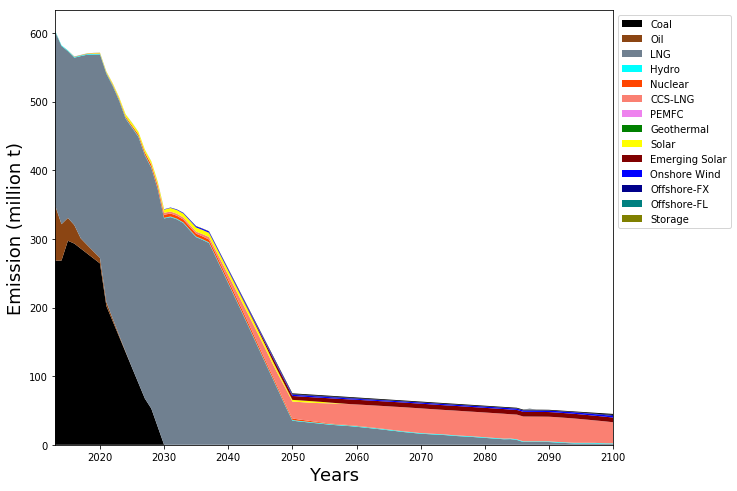

In [20]:
ordlegend2=['Alkaline EC','PEM EC','H2 Tank']
           
colours2 = ['aqua','orangered','saddlebrown', 'slategray']
          
fig2, ax2 = plt.subplots(figsize=(10, 8))
pltyrs2=range(2013,2101)
ax2.stackplot(pltyrs2,  pltdict4['FTE-EALKH22'], pltdict4['FTE-EPEMH22'],pltdict4['FTE-LTH22'], 
             labels=ordlegend2, colors=colours2)
ax2.set_xlim((2013, 2100))
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax2.set_xlabel('Years',fontsize='18')
ax2.set_ylabel('Generation (GWh)',fontsize='18')
fig2.savefig('h2_sources_huff.png',bbox_inches='tight', dpi=300)


ordlegend3=['Coal','Oil', 'LNG',
            'Hydro','Nuclear',
           'CCS-LNG','PEMFC',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind','Offshore-FX','Offshore-FL',#'Storage',
           'Storage'
          ]
colours3 = ['black', 'saddlebrown', 'slategray',
            'aqua','orangered',
           'salmon','violet',
           'green','yellow','maroon',
           'blue','darkblue','teal','olive'
          ]
fig3, ax3 = plt.subplots(figsize=(10, 8))
pltyrs3=range(2013,2101)
ax3.stackplot(pltyrs3,pltdict2['ELCTECOA'],pltdict2['ELCTEOIL'], pltdict2['ELCTELNG']+pltdict2['ELCCC17'],
              pltdict2['ELCTEHYD'],pltdict2['ELCTENUC'],             
             pltdict2['LNGCCS22'],pltdict2['PEMFC22'],
              pltdict2['ELCTEGEO'],pltdict2['ELCTEPVS']+pltdict2['ELCPVN17'],pltdict2['EMSOL17'],
             pltdict2['ELCTEWND']+pltdict2['ELCWON17'],pltdict2['ELCWOFX17'],pltdict2['ELCWOFL17'],
            pltdict2['FTE-ELCSTG17'],pltdict2['FTE-EALKH22'],pltdict2['FTE-EPEMH22'],pltdict2['FTE-LTH22'],
             labels=ordlegend3, colors=colours3)
ax3.set_xlim((2013, 2100))
ax3.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax3.set_xlabel('Years',fontsize='18')
ax3.set_ylabel('Emission (million t)',fontsize='18')
fig3.savefig('co2_sources.png',bbox_inches='tight', dpi=300)